# CDIPpy Example - Wave Spectrum
The following example runs an application of the [CDIPpy](https://ucsd-sio-cdip.github.io/CDIPpy/quickstart/) python library to create a plot of wave spectrum (1-D).  A single spectral wave record contains energy density and mean wave direction for each frequency bin (click here for an explanation of a CDIP spectral file). The top frame plots energy density vs. frequency, and the second plots mean wave direction vs. frequency. Note that the x-axis includes a scale for both frequency in Hz (bottom) and period in seconds (top).

1) read in CDIP station metadata,
2) access wave spectra data for single time record of interest,
3) plot energy density across frequency bands


## Import Libraries

Start by importing the necessary python packages and CDIPPY module

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar

# CDIP imports
import cdippy
from cdippy.stndata import StnData

## Initialize CDIPpy input parameters
* Supply CDIP station id
* Start date (YYYYMMDDHH)
* End date
* Station parameters

In [46]:
##- Initialize station id, start/end date, and parameters
stn = '100p1'
sdate = '200805210900'
edate = '200805210930'
params = ['waveFrequency','waveEnergyDensity','waveMeanDirection','waveTime']

## Data Access

* Use cdippy.stndata function StnData(stn)
* Returns StnData object
* Access station metadata about individual stations deployments

In [47]:
##- Get Station Dataset object
stn_data = cdippy.stndata.StnData(stn)

##- Get metadata (i.e. information about individual deployments)
meta = stn_data.get_stn_meta()
stn_name = meta['metaStationName']
print(stn_name)

TORREY PINES OUTER, CA BUOY - 100p1


### Grab spectra data using 'get_series' or 'get_spectra' function
Can use either function to return a dictionary of arrays for each variable as a key.

* get_series: User defines which variables are returned.

* get_spectra: Returns all wave spectra variables.
  * 'waveMeanDirection',
  * 'waveB1Value',
  * 'waveEnergyDensity',
  * 'waveA1Value',
  * 'waveA2Value',
  * 'waveCheckFactor',
  * 'waveB2Value

stn_data.get_series(start, end, params)
* start: start datetime (datetime obj)
* end: end datetime (datetime obj)
* params: list of parameters
  
stn_data.get_series(start, end)
* start: start datetime (datetime obj)
* end: end datetime (datetime obj)
* params: list of parameters

In [67]:
##- Use CDIPPY to convert input start/end date strings to datetime objects
start = cdippy.utils.cdip_datetime(sdate)
end = cdippy.utils.cdip_datetime(edate)

##- Grab data using 'get_series' function
data = stn_data.get_series(start, end, params)

##- Grab data using 'get_spectra' function
spdata = stn_data.get_spectra(start,end)
spdata.keys()

dict_keys(['waveMeanDirection', 'waveCheckFactor', 'waveB1Value', 'waveB2Value', 'waveEnergyDensity', 'waveTime', 'waveA2Value', 'waveA1Value'])

## Convert waveTimes to Datetime object

In [68]:
## Convert wave times to datetime objects (currently integers)
##- Convert times to datetime objects
wT = [cdippy.utils.timestamp_to_datetime(x) for x in spdata['waveTime']]

In [69]:
## Find closest value in data array to start time (if more than one record returned)
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

idx = find_nearest(np.array(wT),start)

## Create a Pandas Dataframe indexed by frequency

In [73]:
## Create pandas dataframe from data
df = pd.DataFrame({'frequency':data['waveFrequency'],'energy': spdata['waveEnergyDensity'].data[0],'mean_direction':spdata['waveMeanDirection'].data[0]})
df.head()

,frequency,energy,mean_direction
0,0.025,0.001089,328.00000
1,0.030,0.002149,283.00000
2,0.035,0.003158,225.34375
3,0.040,0.003651,245.03125
4,0.045,0.014657,274.56250


## Plot wave energy density and mean direction versus frequency

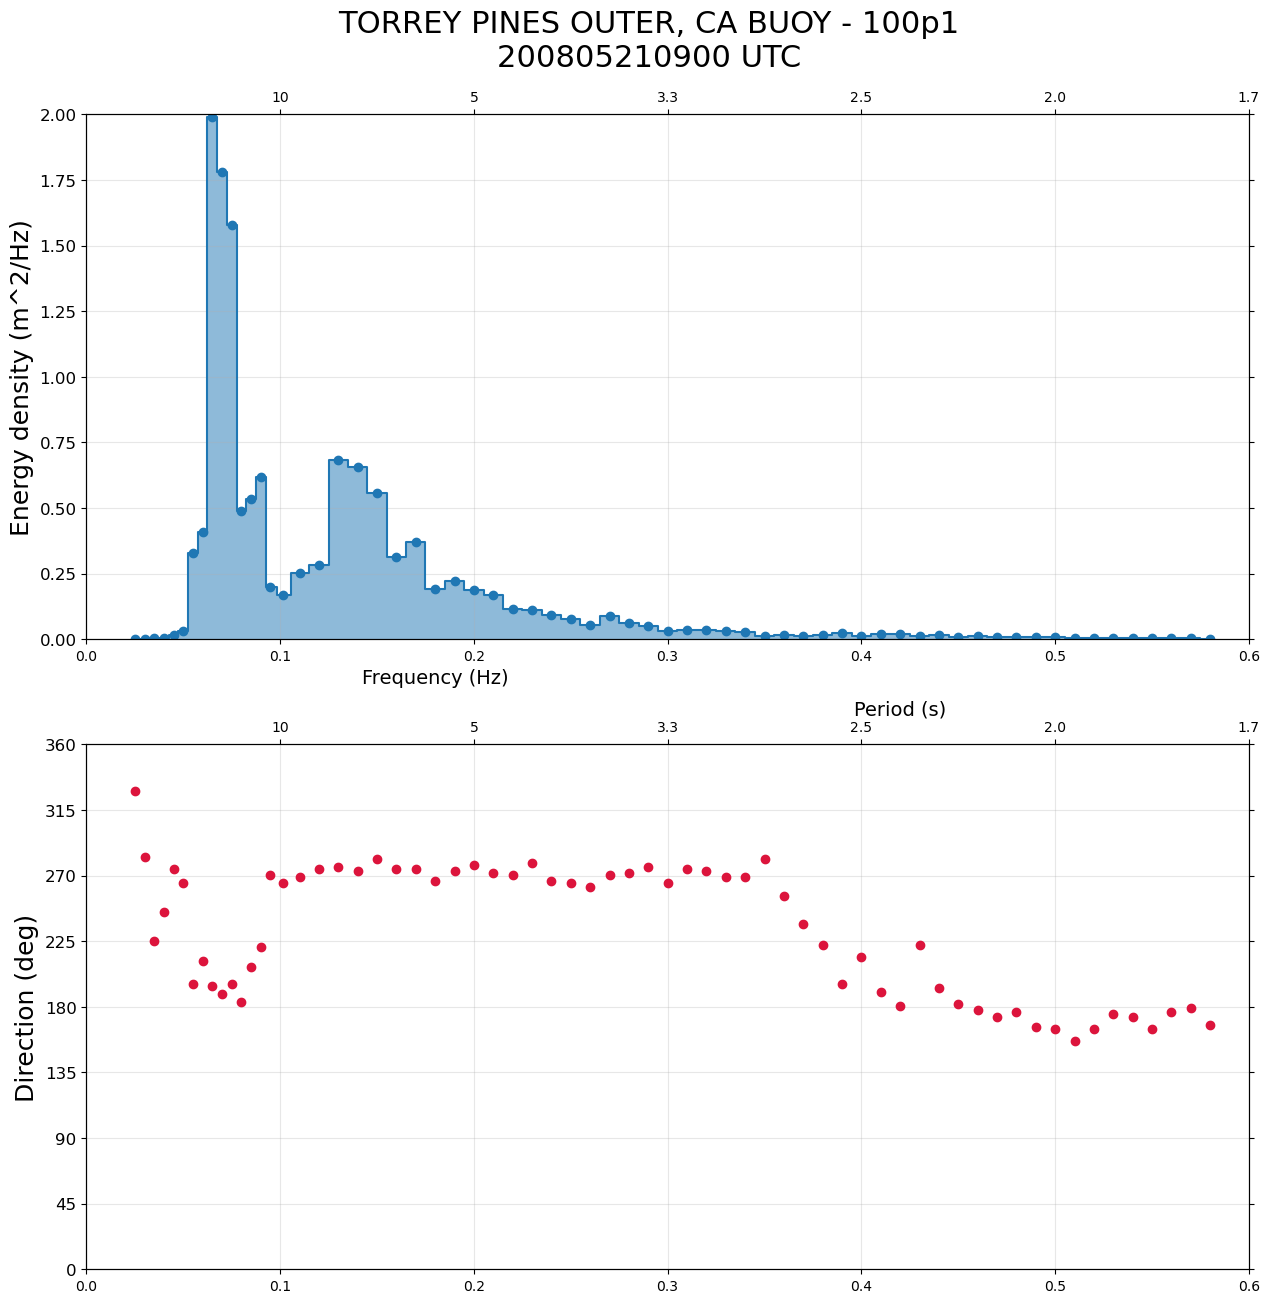

In [90]:
# Create figure and specify figure size
fig = plt.figure(figsize=(15, 15))

# Create 2 stacked subplots for Energy Density (Ed) and Mean Direction (Dmean)
pEd = plt.subplot(2, 1, 1)
pEd.step(df['frequency'], df['energy'], marker='o', where='mid')
pEd.fill_between(df['frequency'], df['energy'], alpha=0.5, step="mid")
pDmean = plt.subplot(2, 1, 2, sharex=pEd)
pDmean.plot(df['frequency'], df['mean_direction'], color='crimson', marker='o', linestyle="")


plt.suptitle(f"{stn_name}\n{sdate} UTC", fontsize=22,y=0.95)
#plt.title(start.strftime("%Y%m%d")+'-'+end.strftime("%Y%m%d"), fontsize=20, y=3.45)

# Set tick parameters
pEd.tick_params(axis='y', which = 'major', labelsize=12, right='off')
pDmean.tick_params(axis='y', which = 'major', labelsize=12, right='off')

# Make secondary x- and y-axes for each graph. Shows both Frequency and Period for x-axes.
pEd2y = pEd.twiny() # Copy x-axis for Graph #1
pDmean2y = pDmean.twiny() # Copy x-axis for Graph #2

# Set axis limits for each plot
ymax = np.ceil(max(df['energy']))
pEd.set_xlim(0, 0.6)
pEd.set_ylim(0, ymax)
pEd2y.set_xlim(0, 0.6)
pDmean.set_ylim(0, 360)
pDmean.set_yticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
pDmean2y.set_xlim(0, 0.6)

# Label each axis
pEd.set_xlabel('Frequency (Hz)', fontsize = 14, x = 0.3)
pEd.set_ylabel('Energy density (m^2/Hz)', fontsize = 18)
pDmean.set_ylabel('Direction (deg)', fontsize = 18)
pDmean2y.set_xlabel('Period (s)', fontsize = 14, x = 0.7)

## Format top axis labels to show 'Period' values at tickmarks corresponding to 'Frequency' x-axs
# Top subplot
pEd2y.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
pEd2y.set_xticklabels(['10', '5', '3.3', '2.5', '2.0', '1.7'])

# Bottom subplot
pDmean2y.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
pDmean2y.set_xticklabels(['10', '5', '3.3', '2.5', '2.0', '1.7'])

# Plot dashed gridlines
pEd.grid(which='major', axis='x', alpha=0.3, linestyle='-')
pEd.grid(which='major', axis='y', alpha=0.3, linestyle='-')
pDmean.grid(which='major', axis='x', alpha=0.3, linestyle='-')
pDmean.grid(which='major', axis='y', alpha=0.3, linestyle='-')
